In [1]:
#libraries
import thesisFunctions
import pandas as pd
import numpy as np
import os
import sys
import simpledbf
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/pipe/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [112]:
#download data from INDEC
thesisFunctions.getEPHInd(trimestre = 't310', path = os.getenv('TESISDATA'))
#read data
rawInd = thesisFunctions.readEPHInd(trimestre = 't310', path = os.getenv('TESISDATA'))
#clean data
cleanInd = thesisFunctions.cleanEPHInd(rawInd)
#dump to csv
cleanInd.to_csv(os.getenv('TESISDATA') + '/cleanInd.csv', index=False)

Directory non existent, creating ...
Original files in directory: /home/pipe/Dropbox/Tesis/latex/thesis/data


In [113]:
data1 = pd.read_csv(os.getenv('TESISDATA') + '/cleanInd.csv')
data1.head()

,CODUSU,NRO_HOGAR,COMPONENTE,AGLOMERADO,PONDERA,familyRelation,female,age,schoolLevel,finishedYear,lastYear,activity,empCond,unempCond,ITF,IPCF,P47T,P21
0,302468,1,1,32,1287,1,2,20,7,2,1.0,3,0,3,4000,2000.0,2000,0
1,302468,1,2,32,1287,10,2,20,6,2,1.0,3,0,3,4000,2000.0,2000,0
2,307861,1,1,32,1674,1,1,42,2,1,NaN,1,3,0,5800,1450.0,3000,3000
3,307861,1,2,32,1674,2,2,44,7,1,NaN,1,3,0,5800,1450.0,2800,2800
4,307861,1,3,32,1674,3,1,13,4,2,0.0,3,0,3,5800,1450.0,0,0


In [3]:
data2 = thesisFunctions.categorizeInd(data1)
data3 = thesisFunctions.schoolYears(data2)
data4 = thesisFunctions.make_dummyInd(data3)
data5 = thesisFunctions.createVariablesInd(data4)

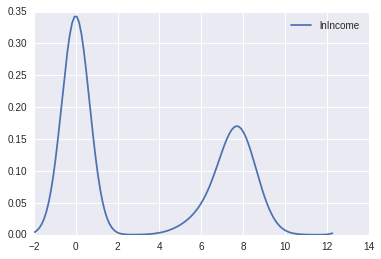

In [4]:
sns.kdeplot(data5.lnIncome)

In [97]:
jobsAndIncome = ((data5.activity==1) & (data5.lnIncome>1))
data6 = data5.copy().loc[jobsAndIncome,:]

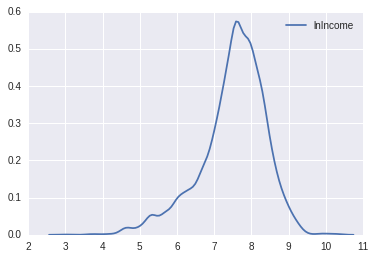

In [98]:
sns.kdeplot(data6.lnIncome)

In [102]:
print data6.shape

(3600, 32)


In [103]:
out = ((data6.lnIncome < 4) | (data6.lnIncome > 10.))
data6 = data6.copy().loc[~out,:]

In [104]:
print data6.shape

(3600, 32)


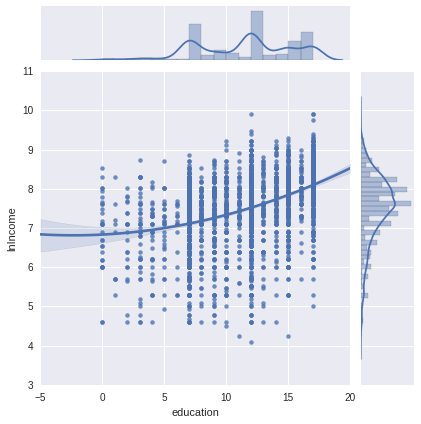

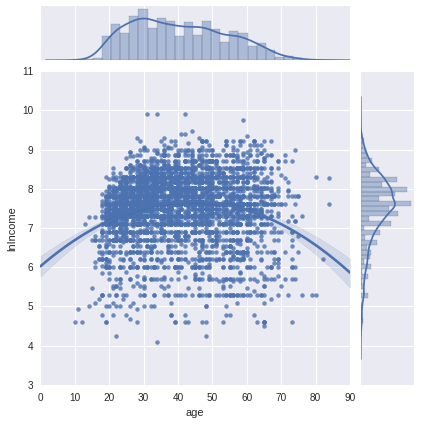

In [105]:
g = sns.JointGrid(x="education", y="lnIncome", data=data6)  
g.plot_joint(sns.regplot, order=2)  
g.plot_marginals(sns.distplot)

g2 = sns.JointGrid(x="age", y="lnIncome", data=data6)  
g2.plot_joint(sns.regplot, order=2)  
g2.plot_marginals(sns.distplot)

In [106]:
model = thesisFunctions.runModel(data6, income = 'lnIncome', variables= [
        'primary','secondary','university',
        'male_14to24','male_25to34',
        'female_14to24', 'female_25to34', 'female_35more'])

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            WLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     170.6
Date:                Thu, 24 Nov 2016   Prob (F-statistic):          1.37e-244
Time:                        19:23:47   Log-Likelihood:                -4059.6
No. Observations:                3600   AIC:                             8137.
Df Residuals:                    3591   BIC:                             8193.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.8644      0.092     74.699      0.0

In [107]:
variables= [
        'primary','secondary','university',
        'male_14to24','male_25to34',
        'female_14to24', 'female_25to34', 'female_35more']
    
X = sm.add_constant(data6.copy().loc[:,variables].values)
data6['predicted'] = model.predict(X)

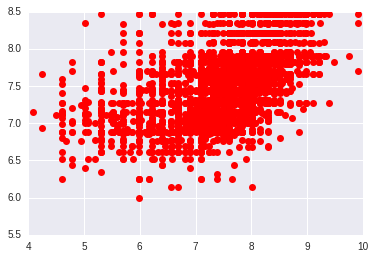

In [119]:
#plt.plot(np.linspace(4,11,100),np.linspace(4,11,100),'b-')
plt.plot(data6.lnIncome,data6.predicted,'ro')


In [109]:
data6['resid'] = data6.lnIncome - data6.predicted 
print data6.resid.mean()

-0.012942959201


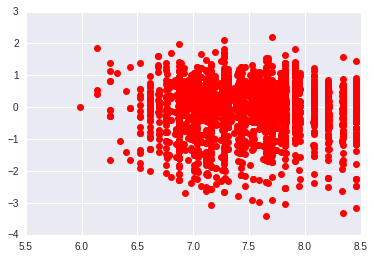

In [110]:
plt.plot(data6.predicted,data6.resid,'ro')